# Домашняя работа Kaggle

## Импорт библиотек

In [1]:
# !pip install -q sweetviz

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
plt.style.use('ggplot')
#to be continued...

%matplotlib inline

## Загрузим и посмотрим на данные

In [3]:
RANDOM_STATE = 42

In [4]:
train_df = pd.read_csv("Life_train.csv")
test_df = pd.read_csv("Life_test.csv")

In [5]:
train_df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [6]:
test_df.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,NaN,1.8,1.7,NaN,NaN
4,2010,178.0,23,0.24,84.623025,82.0,190,16.4,30,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

In [8]:
train_df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
test_df.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

В названиях колонок есть лишние пробелы, уберем их, также переименуем некоторые колонки

In [10]:
train_df.columns = [
    'Year',
    'Life expectancy',
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'percentage expenditure',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'Diphtheria',
    'HIV/AIDS',
    'GDP',
    'Population',
    'thinness  1-19',
    'thinness 5-9',
    'Income composition',
    'Schooling',
]

In [11]:
test_df.columns = [
    'Year',
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'percentage expenditure',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'Diphtheria',
    'HIV/AIDS',
    'GDP',
    'Population',
    'thinness  1-19',
    'thinness 5-9',
    'Income composition',
    'Schooling',
]

Посмотрим на пропущенные значения в данных

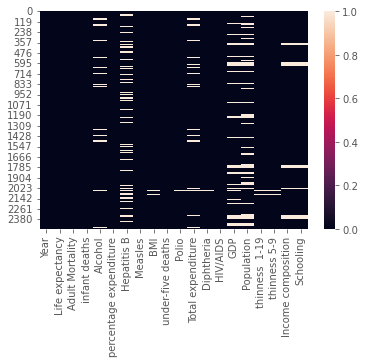

In [12]:
sns.heatmap(train_df.isna());

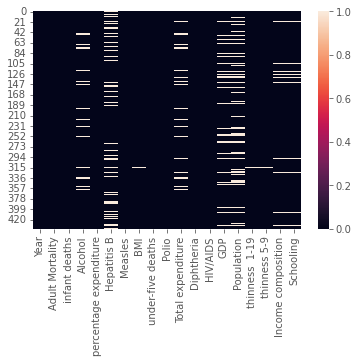

In [13]:
sns.heatmap(test_df.isna());

In [14]:
train_df.isna().sum()

Year                        0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                   167
percentage expenditure      0
Hepatitis B               480
Measles                     0
BMI                        28
under-five deaths           0
Polio                      18
Total expenditure         196
Diphtheria                 18
HIV/AIDS                    0
GDP                       386
Population                554
thinness  1-19             28
thinness 5-9               28
Income composition        146
Schooling                 146
dtype: int64

In [15]:
# report = sv.analyze(train_df)
# report.show_notebook(w="100%", h="full")

In [16]:
train_df.columns[train_df.isnull().any()]

Index(['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'GDP', 'Population', 'thinness  1-19', 'thinness 5-9',
       'Income composition', 'Schooling'],
      dtype='object')

In [17]:
test_df.columns[test_df.isnull().any()]

Index(['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'GDP', 'Population', 'thinness  1-19', 'thinness 5-9',
       'Income composition', 'Schooling'],
      dtype='object')

Из отчета видим, что все колонки - числовые, также для нескольких признаков высокий процент пропущенных значений
Признаки, для которых присутствуют пропущенные значения:
 - ```Alcohol```
 -```Hepatitis B```
 -```BMI```
 -```Polio```
 -```Total expenditure```
 -```Diphtheria```
 -```GDP```
 -```Population```
 -```thinness  1-19```
 -```thinness 5-9```
 -```Income composition```
 -```Schooling```

Построим матрицу корреляции

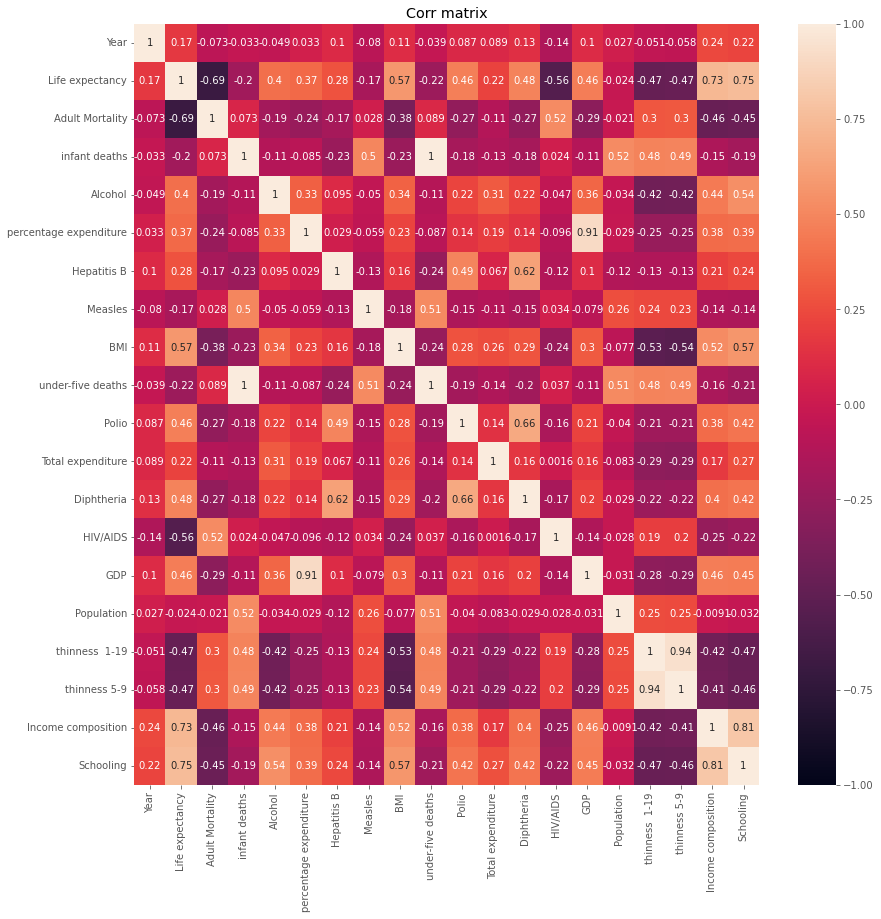

In [18]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1,)
plt.title("Corr matrix");

## Обработка данных и обучение линейной регрессии

In [19]:
def train_regression(X_train, X_val, y_train, y_val):
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(f"MSE Score: {metrics.mean_squared_error(y_val, pred)}")
    print(f"MAE Score: {metrics.mean_absolute_error(y_val, pred)}")
    print(f"R2 Score: {metrics.r2_score(y_val, pred)}")

### Как поступить с пропущенными значениями и выжить в неидеальном мире

Попробуем несколько стратегий обработки пропущенных значений

#### Удалим пропущенные значения

In [20]:
train_df_dropped = train_df.dropna().copy()
std = StandardScaler()
X = std.fit_transform(train_df_dropped.drop(columns=["Life expectancy"]).copy())
y = train_df_dropped["Life expectancy"].copy()

In [21]:
print(train_df.shape[0], X.shape[0])

2489 1387


Как мы видим, удалилась почти половина данных, что не есть хорошо

In [22]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

train_regression(X_train, X_val, y_train, y_val)

MSE Score: 13.322859822764807
MAE Score: 2.7606225065896015
R2 Score: 0.8247553128990479


#### Заполним пропущенные значения средним

In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df_mean = pd.DataFrame(imputer.fit_transform(train_df))
train_df_mean.columns = train_df.columns
train_df_mean.index = train_df.index

X = std.fit_transform(train_df_mean.drop(columns=['Life expectancy']))
y = train_df_mean['Life expectancy']

In [24]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 17.494565148641396
MAE Score: 3.1359693147967214
R2 Score: 0.8143708149886068


In [25]:
df1 = train_df.drop('Life expectancy', axis=1)

#### Линейная интерполяция

In [26]:
train_df_inter = train_df.interpolate(method='linear', limit_direction='forward')
test_df_inter = test_df.interpolate(method='linear', limit_direction='forward')

In [27]:
X = std.fit_transform(train_df_inter.drop(columns=['Life expectancy']))
y = train_df_inter['Life expectancy']

In [28]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 18.00315270776096
MAE Score: 3.17328787960695
R2 Score: 0.8089743565282699


#### KNN Imputer

In [29]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')
train_df_mean = pd.DataFrame(imputer.fit_transform(train_df))
test_df_mean = pd.DataFrame(imputer.fit_transform(test_df))
test_df_mean.columns = test_df.columns
test_df_mean.index = test_df.index
train_df_mean.columns = train_df.columns
train_df_mean.index = train_df.index

X = std.fit_transform(train_df_mean.drop(columns=['Life expectancy']))
y = train_df_mean['Life expectancy']

In [30]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 16.55013421976327
MAE Score: 3.046890478628558
R2 Score: 0.8243918667917043


In [31]:
model = linear_model.LinearRegression()
model.fit(X, y)
pred = model.predict(std.transform(test_df_mean))
submission = pd.DataFrame({"index": test_df.index, "Life expectancy": pred})

In [32]:
print(model_selection.cross_val_score(model, X, y, cv=5))

[0.82183953 0.82145534 0.80715632 0.7277971  0.82457705]


In [33]:
df1 = train_df_mean.drop('Life expectancy', axis=1)

In [34]:
pd.DataFrame({"Columns": df1.columns, "Coefficients": model.coef_})

,Columns,Coefficients
0,Year,-0.108442
1,Adult Mortality,-2.276933
2,infant deaths,12.019639
3,Alcohol,0.371541
4,percentage expenditure,0.130025
5,Hepatitis B,-0.183344
6,Measles,-0.171889
7,BMI,0.724996
8,under-five deaths,-12.159002
9,Polio,0.600339


In [35]:
submission.head()

,index,Life expectancy
0,0,75.545937
1,1,75.755243
2,2,73.698891
3,3,62.551374
4,4,65.957367


In [36]:
submission.to_csv("test_submission.csv", index=False)

In [37]:
imputer = IterativeImputer(max_iter=30, random_state=RANDOM_STATE)
train_df_mean = pd.DataFrame(imputer.fit_transform(train_df))
test_df_mean = pd.DataFrame(imputer.fit_transform(test_df))
test_df_mean.columns = test_df.columns
test_df_mean.index = test_df.index
train_df_mean.columns = train_df.columns
train_df_mean.index = train_df.index

X = std.fit_transform(train_df_mean.drop(columns=['Life expectancy']))
y = train_df_mean['Life expectancy']
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
test_df_mean = poly.transform(std.transform(test_df_mean))

In [38]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 14.246586903774622
MAE Score: 2.2606696234938037
R2 Score: 0.8488340639694582


In [39]:
model = linear_model.LinearRegression()
model.fit(X, y)
pred = model.predict(test_df_mean)
submission = pd.DataFrame({"index": test_df.index, "Life expectancy": pred})

In [40]:
print(model_selection.cross_val_score(model, X, y, cv=5))

[ 0.89938354  0.86884348 -7.39250363  0.50173037  0.76974004]


In [42]:
submission.to_csv("submission_with_poly.csv", index=False)


### Поработаем с признаками

In [43]:
imputer = IterativeImputer(max_iter=5, random_state=RANDOM_STATE)
train_df_itr = pd.DataFrame(imputer.fit_transform(train_df))
test_df_itr = pd.DataFrame(imputer.fit_transform(test_df))
test_df_itr.columns = test_df.columns
test_df_itr.index = test_df.index
train_df_itr.columns = train_df.columns
train_df_itr.index = train_df.index

In [44]:
scaler = PowerTransformer()
X = train_df_itr.drop('Life expectancy', axis=1)
y = train_df_itr['Life expectancy']
X = scaler.fit_transform(X)
test_df_itr = scaler.transform(test_df_itr)
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
test_df_itr = poly.transform(test_df_itr)

In [45]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 6.8796766064834145
MAE Score: 1.905527929364917
R2 Score: 0.9270019717121898


In [46]:
model = linear_model.LinearRegression()
model.fit(X, y)
pred = model.predict(test_df_itr)
submission = pd.DataFrame({"index": test_df.index, "Life expectancy": pred})

In [47]:
print(model_selection.cross_val_score(model, X, y, cv=5))

[0.92204605 0.845432   0.63951591 0.84018116 0.89031639]


In [48]:
submission.to_csv("submission_with_poly_power.csv", index=False)

In [49]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.52303655 0.07811138]


In [50]:
X.shape[1]

210

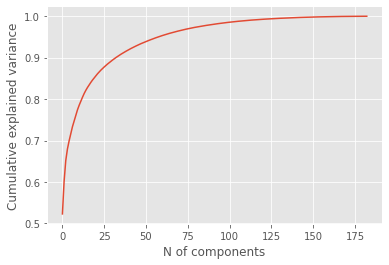

In [51]:
pca = PCA(svd_solver='full', n_components=183)
pca_full = pca.fit(X)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('N of components')
plt.ylabel('Cumulative explained variance');

In [52]:
X_pca = pca.fit_transform(X)
test_df_pca = pca.transform(test_df_itr)

In [53]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_pca, y, test_size=0.3, random_state=RANDOM_STATE)
train_regression(X_train, X_val, y_train, y_val)

MSE Score: 6.850428639732097
MAE Score: 1.899869309100643
R2 Score: 0.9273123124485931


In [54]:
model = linear_model.LinearRegression()
model.fit(X_pca, y)
pred = model.predict(test_df_pca)
submission = pd.DataFrame({"index": test_df.index, "Life expectancy": pred})

In [55]:
print(model_selection.cross_val_score(model, X_pca, y, cv=5))

[0.92271412 0.84071288 0.55469421 0.87181435 0.88682315]


In [56]:
submission.to_csv("submission_with_pca.csv", index=False)

In [57]:
X = train_df_mean.drop(['Life expectancy'], axis=1)
y = train_df['Life expectancy']

In [58]:
X['Year'] = X['Year'].astype('int')

In [59]:
import optuna

In [60]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y, 
    test_size=0.2,
    random_state=RANDOM_STATE,
)

In [61]:
from sklearn.metrics import mean_squared_error

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
    depth = trial.suggest_int("depth", 4, 10)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1e-8, 100)

    model = CatBoostRegressor(
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        verbose=False,
        task_type='GPU',
        cat_features=['Year']
    )

    # Train and evaluate the model here using cross-validation or a validation dataset
    # For example:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [62]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2023-04-10 14:20:58,847] A new study created in memory with name: no-name-02e6cbff-96d1-46cd-beef-b166621418b0
[I 2023-04-10 14:21:55,600] Trial 0 finished with value: 3.6282461426499677 and parameters: {'learning_rate': 0.2212865247230965, 'depth': 10, 'l2_leaf_reg': 62.675935391878994}. Best is trial 0 with value: 3.6282461426499677.
[I 2023-04-10 14:22:28,094] Trial 1 finished with value: 3.9763082847376547 and parameters: {'learning_rate': 0.21920469891675134, 'depth': 9, 'l2_leaf_reg': 71.10609769843381}. Best is trial 0 with value: 3.6282461426499677.
[I 2023-04-10 14:22:40,628] Trial 2 finished with value: 3.723888074378445 and parameters: {'learning_rate': 0.25559089978395244, 'depth': 5, 'l2_leaf_reg': 90.13315575765029}. Best is trial 0 with value: 3.6282461426499677.
[I 2023-04-10 14:22:58,592] Trial 3 finished with value: 4.153739443375302 and parameters: {'learning_rate': 0.07180718294296598, 'depth': 7, 'l2_leaf_reg': 63.92187932629451}. Best is trial 0 with value: 3.6

KeyboardInterrupt: 